In [1]:
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [2]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 38.5286154115*lal.MSUN_SI
m2 = 33.4005351902*lal.MSUN_SI
phi_c = 0.
f_start22 = 20. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
spin1_z = 0.00346990177835
spin2_z =  0.0440040414498
deltaT = 1./16384.
domega220, dtau220 = 0.5, 0.5
domega210, dtau210 = 0., 0.
domega330, dtau330 = 0., 0.
domega440, dtau440 = 0., 0.
domega550, dtau550 = 0., 0.

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


/Users/abhirupghosh/.pyenv/versions/3.6.9/envs/pSEOBNRv4HM_tgr_injections/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/abhirupghosh/.pyenv/versions/3.6.9/envs/pSEOBNRv4HM_tgr_injections/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/abhirupghosh/.pyenv/versions/3.6.9/envs/pSEOBNRv4HM_tgr_injections/lib/python3.6/

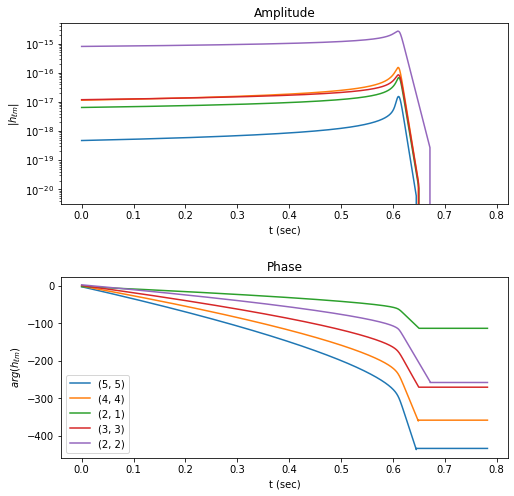

In [3]:
sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, \
                        m1, m2, f_start22, distance, spin1_z, spin2_z, 41, \
                        0., 0., 0.,0.,0.,0.,0.,0.,1.,1., domega220, dtau220, \
                        domega210, dtau210, domega330, dtau330, domega440, dtau440, \
                        domega550, dtau550, nqcCoeffsInput, 0)

hlm = {}

##55 mode
modeL = sphtseries.l
modeM = sphtseries.m
print('Loading mode', modeL, modeM)
h55 = sphtseries.mode.data.data #This is h_55
hlm[(modeL, modeM)] = h55

##44 mode
modeL = sphtseries.next.l
modeM = sphtseries.next.m
print('Loading mode', modeL, modeM)
h44 = sphtseries.next.mode.data.data #This is h_44
hlm[(modeL, modeM)] = h44

##21 mode
modeL = sphtseries.next.next.l
modeM = sphtseries.next.next.m
print('Loading mode', modeL, modeM)
h21 = sphtseries.next.next.mode.data.data #This is h_21
hlm[(modeL, modeM)] = h21

##33 mode
modeL = sphtseries.next.next.next.l
modeM = sphtseries.next.next.next.m
print('Loading mode', modeL, modeM)
h33 = sphtseries.next.next.next.mode.data.data #This is h_33
hlm[(modeL, modeM)] = h33

##22 mode
modeL = sphtseries.next.next.next.next.l
modeM = sphtseries.next.next.next.next.m
print('Loading mode', modeL, modeM)
h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
hlm[(modeL, modeM)] = h22

##time array (s)
time_array = np.arange(0,len(h22)*deltaT,deltaT)

plt.figure(figsize=(8,8))
for mode in hlm.keys():
    plt.subplot(211)
    plt.semilogy(time_array,np.abs(hlm[mode]), label=str(mode))
    plt.xlabel('t (sec)')
    plt.ylabel('$|h_{\ell m}|$')
    plt.title('Amplitude') 
    plt.subplot(212)
    plt.plot(time_array,np.unwrap(np.angle(hlm[mode])), label=str(mode))
    plt.xlabel('t (sec)')
    plt.ylabel('$arg(h_{\ell m})$')
    plt.title('Phase') 
plt.xlabel('t (sec)')   
plt.legend()
plt.subplots_adjust(hspace=0.4)
plt.show()    

No handles with labels found to put in legend.


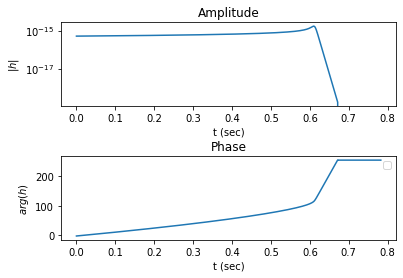

In [4]:
inclination = 153.95

paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data

plt.subplot(211)
plt.semilogy(time_array, np.abs(h))
plt.xlabel('t (sec)')
plt.ylabel('$|h|$')
plt.title('Amplitude') 
plt.subplot(212)
plt.plot(time_array,np.unwrap(np.angle(h)))
plt.xlabel('t (sec)')
plt.ylabel('$arg(h)$')
plt.title('Phase') 
plt.xlabel('t (sec)')   
plt.legend()
plt.subplots_adjust(hspace=0.6)
plt.show()

In [10]:
import numpy as np
a = np.arange(10)

In [12]:
a[:2]

array([0, 1])